## Bibliotecas y funciones

In [ ]:
import pandas as pd
import numpy as np

import re
import operator

import contractions
from collections import Counter
import random

import matplotlib.pyplot as plt


In [22]:
def leer_libro(archivo_txt):
  '''Función para leer un archivo en formato txt'''
  
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [5]:
def limpiar_texto(texto):
    '''Función para convertir a minúsculas, quitar signos de puntuación , números, tildes'''

    # Quitar contracciones
    texto = contractions.fix(texto)
    # Convertir a mínusculas
    texto = texto.lower()
    # Quitar puntuaciones y números 
    texto = re.sub('[^a-z]+', ' ', texto)

    return texto

In [6]:
def obtener_ngramas(texto, N):
    palabras_en_texto = texto.split()
    ngramas = (tuple(palabras_en_texto[i:i+N]) for i in range(len(palabras_en_texto) - N+1))
    return ngramas

## Leer y limpiar archivo de texto

In [8]:
!wget https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt

--2025-03-18 23:30:34--  https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492006 (480K) [text/plain]
Saving to: ‘HP1.txt’

HP1.txt             100%[===================>] 480.47K  --.-KB/s    in 0.1s    

2025-03-18 23:30:35 (4.09 MB/s) - ‘HP1.txt’ saved [492006/492006]



In [23]:
libro = leer_libro('HP1.txt')

# lista con cadenas correspondientes al pie de página.
borrar = ['Page | {} Harry Potter and the Philosophers Stone - J.K. Rowling'.format(i)\
         for i in range(2,347)]

for tx in borrar:
    libro = libro.replace(tx, '')

libro 

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t  

In [24]:
libro_limpio = limpiar_texto(libro)
libro_limpio[:1500]

'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you would expect to be involved in anything strange or mysterious because they just did not hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they did not think they could bear it if anyone found out about the potters mrs potter was mrs dursley s sister but they had not met for several years

## Distribución de probabilidad de las palabras en el libro.

In [25]:
palabras_en_libro = len(libro_limpio.split())
print(f'Palabras en el libro de HP: {palabras_en_libro}')

Palabras en el libro de HP: 80682


Counter es una "colección" donde los elementos encontrados en cualquier objeto iterable son guardados como claves de un diccionario y el conteo como valores.

Asi como la funcion "most_common()" que proviene de la libreria de la clase Counter del modulo collections

In [26]:
palabras_frecuencia = Counter(libro_limpio.split())
print(palabras_frecuencia)


Counter({'the': 3651, 'and': 1935, 'to': 1872, 'he': 1757, 'a': 1687, 'harry': 1336, 'of': 1311, 'was': 1262, 'it': 1186, 'you': 1037, 'not': 1014, 'in': 967, 'his': 936, 'i': 923, 'said': 794, 'had': 755, 'they': 690, 'that': 688, 'on': 637, 'is': 629, 'at': 625, 's': 564, 'as': 526, 'him': 500, 'have': 491, 'but': 485, 'ron': 429, 'would': 421, 'with': 416, 'all': 399, 'what': 386, 'out': 375, 'up': 372, 'for': 370, 'hagrid': 370, 'be': 366, 'them': 339, 'were': 332, 'do': 325, 'there': 313, 'are': 308, 'could': 303, 'did': 297, 'hermione': 269, 'back': 261, 'we': 261, 'one': 256, 'she': 253, 'this': 251, 'will': 247, 'if': 245, 'from': 241, 'so': 238, 'about': 225, 'know': 222, 'into': 219, 'an': 219, 'me': 219, 'their': 217, 'been': 211, 'got': 207, 'off': 201, 'who': 200, 'no': 195, 'get': 195, 'like': 192, 'down': 182, 'just': 180, 'her': 180, 'see': 180, 'professor': 180, 'when': 178, 'very': 172, 'over': 171, 'snape': 171, 'looked': 169, 'now': 166, 'then': 165, 'dumbledore': 1

In [27]:
palabras_frecuencia.most_common(10)

[('the', 3651),
 ('and', 1935),
 ('to', 1872),
 ('he', 1757),
 ('a', 1687),
 ('harry', 1336),
 ('of', 1311),
 ('was', 1262),
 ('it', 1186),
 ('you', 1037)]

In [29]:
vocabulario = list(palabras_frecuencia.keys())
print('Palabras en el vocabulario de HP:', len(vocabulario))

Palabras en el vocabulario de HP: 5704


Visualización de la probabilidad de ocurrencia de las 80 palabras más frecuentes.

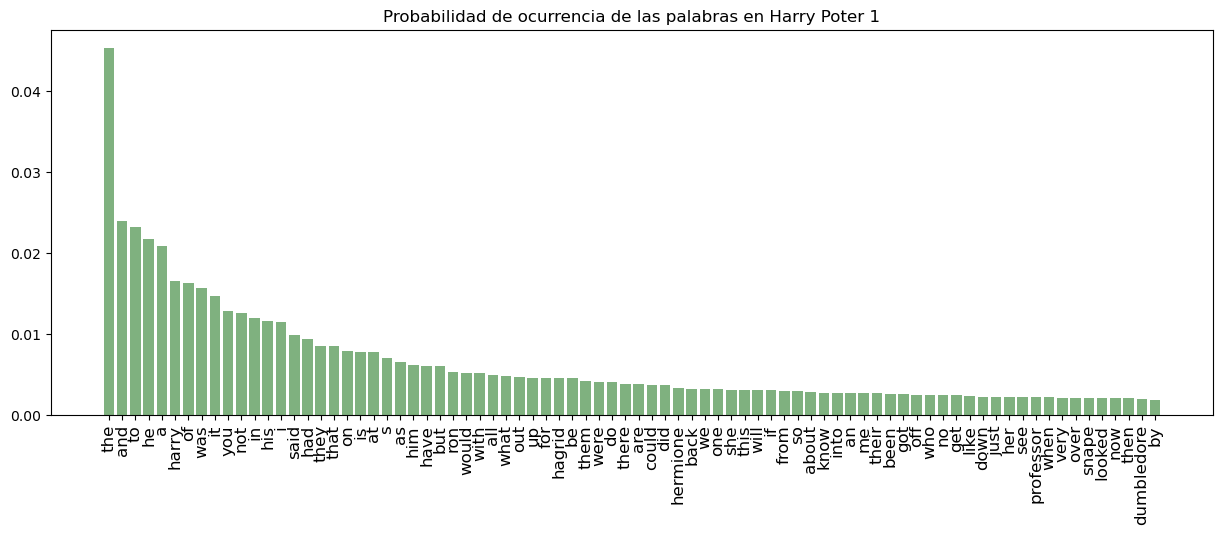

In [30]:
probabilidad_palabra = {k:v / len(libro_limpio.split()) for k, v in palabras_frecuencia.most_common(80)}

x, y = zip(*sorted(probabilidad_palabra.items(), key = operator.itemgetter(1), reverse = True))

fig = plt.figure(figsize = (15, 5))
plt.bar(x,y,
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Harry Poter 1')
plt.show()

## Generación de texto con distribución uniforme.

1. Declaramos una lista vacía donde guardaremos las palabras que tendra el texto.
2. Escojemos la primera palabra de forma aleatoria con distribución uniforme.

In [ ]:
palabras = []

# Escojemos la primera palabra de manera aleatoriamente con distribución uniforme.
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

' '.join(palabras)

'haircut'

In [ ]:
long = 10
for _ in range(long):
    palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
    palabras.append(palabra_selec)

' '.join(palabras)

'haircut  old  stewed  tapestry  grandmother  wafting  swapped  jupiter  cornflakes  accident  curse  cared  upright  stewed  speak  street  happiest  daughter  knitted  payin  kindly  killin  throats  slowed  headfirst  fifty  elixir  cool  whirl  blazing  wildly  confessed  september  point  professor  sixty  greenhouses  grunnings  ah  carpet  sheared'

Lo que sería equivalente a lo siguiente sin necesidad de un for loop:

In [38]:
' '.join(np.random.choice(vocabulario, 100))

'barbers stacked birdcage uneasy caput even jot unseen turn mugs clicked insultin surrounding wind wrapped rose interfere katie minded seventy whose carriages madly airily removed without k waffle witches nitwit jig almost omen meet flitwick courage warmer johnson maps eight slowed icing transfiguration bars seaweed vindictus smoothly tabby ruined paper sweating side including drain suit rejoice alas gritted cane interested exasperated undursleyish gulp waves flock met tick frozen bearded astronomy vindictus slept scruff thicker chalk stale teeth peace pin fires relation ended dinnertime mighta vol nor enjoying nothing interesting abnormal paid spite shortly ripping nails why bridge punishing glider stuck'

## Generación de texto con distribución de palabras en HP.

In [39]:
' '.join(random.sample(libro_limpio.split(), 100)) # Distribución de palabras en el libro.

'suddenly you ingredients bent the am you through you us not threw of they picked robe was in dumbledore toilet an loyalties for chortled here dursley said said the at mad hogwarts beetle ear was go said leaned liked a are like boy open all slowly boastful woman violet will hagrid ever asked the and for in seized is do at we dragon though so at feet and doing very snake and ever came i asked visit k toys ll neck find by just that yet the hermione that vernon ceiling flamel opened all silent they burn glass had and'

## Generación de texto usando N-Gramas

In [40]:
unigramas = palabras_frecuencia
print('Unigramas unicos: ', len(unigramas), end = '\n\n')
list(unigramas.items())[:10]

Unigramas unicos:  5704



[('the', 3651),
 ('boy', 85),
 ('who', 200),
 ('lived', 9),
 ('mr', 81),
 ('and', 1935),
 ('mrs', 46),
 ('dursley', 57),
 ('of', 1311),
 ('number', 17)]

In [42]:
bigramas = Counter(obtener_ngramas(libro_limpio, 2))
print('Bigramas unicos: ', len(bigramas), end = '\n\n')
list(bigramas.items())[:10]

Bigramas unicos:  41298



[(('the', 'boy'), 27),
 (('boy', 'who'), 7),
 (('who', 'lived'), 3),
 (('lived', 'mr'), 1),
 (('mr', 'and'), 3),
 (('and', 'mrs'), 7),
 (('mrs', 'dursley'), 19),
 (('dursley', 'of'), 1),
 (('of', 'number'), 4),
 (('number', 'four'), 8)]

In [44]:
trigramas = Counter(obtener_ngramas(libro_limpio, 3))
print('Trigramas unicos: ', len(trigramas), end = '\n\n')
list(trigramas.items())[:10]

Trigramas unicos:  69499



[(('the', 'boy', 'who'), 4),
 (('boy', 'who', 'lived'), 2),
 (('who', 'lived', 'mr'), 1),
 (('lived', 'mr', 'and'), 1),
 (('mr', 'and', 'mrs'), 3),
 (('and', 'mrs', 'dursley'), 4),
 (('mrs', 'dursley', 'of'), 1),
 (('dursley', 'of', 'number'), 1),
 (('of', 'number', 'four'), 4),
 (('number', 'four', 'privet'), 1)]

In [46]:
trigramas.most_common(30)

[(('out', 'of', 'the'), 63),
 (('i', 'do', 'not'), 46),
 (('he', 'did', 'not'), 38),
 (('harry', 'and', 'ron'), 37),
 (('there', 'was', 'a'), 35),
 (('he', 'could', 'not'), 35),
 (('ron', 'and', 'hermione'), 33),
 (('do', 'not', 'know'), 31),
 (('it', 'was', 'a'), 28),
 (('one', 'of', 'the'), 27),
 (('in', 'front', 'of'), 25),
 (('you', 'know', 'who'), 23),
 (('they', 'did', 'not'), 22),
 (('seemed', 'to', 'be'), 22),
 (('harry', 'did', 'not'), 22),
 (('have', 'got', 'to'), 22),
 (('he', 'had', 'not'), 21),
 (('it', 'was', 'not'), 21),
 (('the', 'end', 'of'), 21),
 (('out', 'of', 'his'), 20),
 (('was', 'going', 'to'), 20),
 (('you', 'do', 'not'), 20),
 (('did', 'not', 'have'), 19),
 (('it', 'is', 'not'), 19),
 (('be', 'able', 'to'), 19),
 (('i', 'have', 'got'), 19),
 (('as', 'though', 'he'), 19),
 (('we', 'have', 'got'), 19),
 (('did', 'not', 'know'), 18),
 (('the', 'rest', 'of'), 18)]

### Crear textos basados en la probabilidad de ocurrencia.

Supongamos que tenemos alguna secuencia inicial, por ejemplo:

In [47]:
secuencia = 'both harry and'

Evaluaremos la probabilidad de que la siguiente palabra `p` sea *hermione* (o cualquier otra)

In [51]:
p = 'hermione' # dudley

# Probabilidad del unigrama

print(f"Veces que aparece el unigrama '{p}' = {unigramas[p]}")
print(f"Palabras que aparecen en el libro '{p}' = {palabras_en_libro}")
print(f"Probabilidad de que aparezca '{p}' = {unigramas[p] / len(libro_limpio.split())}")


Veces que aparece el unigrama 'hermione' = 269
Palabras que aparecen en el libro 'hermione' = 80682
Probabilidad de que aparezca 'hermione' = 0.00333407699362931


In [ ]:
# Probabilidad del bigrama

print(f"Veces que aparece el bigrama 'and {p}' = {bigramas[('and', p)]}")
print(f"Veces que aparece el unigrama 'and' = {unigramas['and']}")
print(f"Probabilidad de que aparezca {p} despues de 'and' = {bigramas[('and', p)] / unigramas['and']}")


Veces que aparece el bigrama 'and hermione' = 53
Veces que aparece el unigrama 'and' = 1935
Probabilidad de que aparezca hermione despues de 'and' = 0.02739018087855297


In [56]:
# Probabilidad del trigrama

print(f"Veces que aparece el trigrama 'harry and {p}' = {trigramas[('harry', 'and', p)]}")
print(f"Veces que aparece el bigrama 'harry and' = {bigramas[('harry', 'and')]}")
print(f"Probabilidad de que aparezca {p} despues de 'harry and' = {trigramas[('harry', 'and', p)] / bigramas[('harry', 'and')]}")

Veces que aparece el trigrama 'harry and hermione' = 14
Veces que aparece el bigrama 'harry and' = 75
Probabilidad de que aparezca hermione despues de 'harry and' = 0.18666666666666668


In [57]:
{k: v for k, v in trigramas.items() if k [-3] == 'harry' and k[-2] == 'and' }

{('harry', 'and', 'gave'): 1,
 ('harry', 'and', 'uncle'): 1,
 ('harry', 'and', 'it'): 1,
 ('harry', 'and', 'dudley'): 3,
 ('harry', 'and', 'seized'): 1,
 ('harry', 'and', 'pointing'): 1,
 ('harry', 'and', 'hagrid'): 1,
 ('harry', 'and', 'they'): 2,
 ('harry', 'and', 'then'): 1,
 ('harry', 'and', 'ron'): 37,
 ('harry', 'and', 'staring'): 1,
 ('harry', 'and', 'hurried'): 1,
 ('harry', 'and', 'what'): 1,
 ('harry', 'and', 'the'): 3,
 ('harry', 'and', 'felt'): 1,
 ('harry', 'and', 'seamus'): 1,
 ('harry', 'and', 'was'): 1,
 ('harry', 'and', 'he'): 1,
 ('harry', 'and', 'i'): 1,
 ('harry', 'and', 'hermione'): 14,
 ('harry', 'and', 'threw'): 1}

Definimos la función para generar texto:

In [58]:
def probabilidad_bigrama(secuencia):
    if secuencia not in bigramas:
        return 0
    return bigramas[secuencia] / unigramas[secuencia[0]]

def probabilidad_trigrama(secuencia):
    if secuencia not in trigramas:
        return 0
    return trigramas[secuencia] / bigramas[secuencia[:2]]

def selecciona_siguiente_token(secuencia):
    lista_palabras_candidatas = []

    # Itera por todos los tokens del vocabulario
    # calculando la probabilidad de seleccionar la siguiente palabra
    for p in vocabulario:
        Prob1 = unigramas[p] / palabras_en_libro
        Prob2 = probabilidad_bigrama((secuencia[-1], p))
        Prob3 = probabilidad_trigrama((secuencia[-2], secuencia[-1], p)) if len(secuencia) >= 3 else 0

        # Usamos una interpolación lineal
        Probabilidad =  0.05*Prob1 + 0.35*Prob2 + 0.60*Prob3
        lista_palabras_candidatas.append((p, Probabilidad))

    # Ordenamos la lista de mayor a menor probabilidad
    lista_palabras_candidatas.sort(key=lambda x: x[1], reverse=True)
    return lista_palabras_candidatas[0][0]



In [59]:
palabras = []
longitud_texto = 200

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)

'irritably he was not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still in the air and then he said i am not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still in the air and then he said i am not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still in the air and then he said i am not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still in the air and then he said i am not'